In [3]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX
import numpy as np

In [4]:
cascPath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades/haarcascade_frontalface_default.xml"
eyePath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades\\haarcascade_eye.xml"
smilePath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades/haarcascade_smile.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)


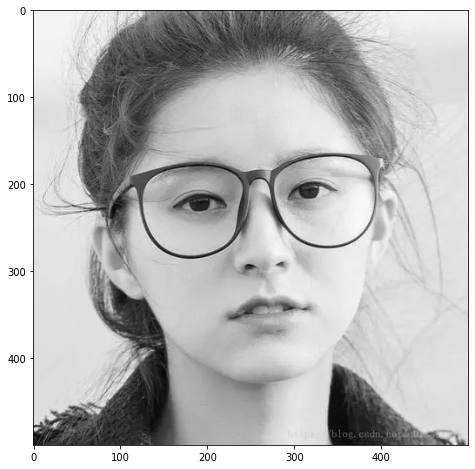

In [5]:
# Load the image
gray = cv2.imread('C:\\Users\\12646\\Desktop\\face_decetor/2.jpeg', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()


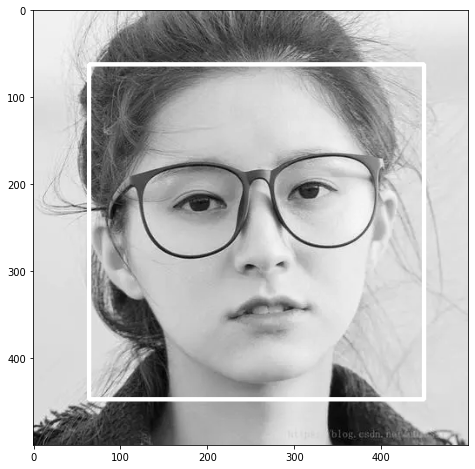

In [6]:
# Detect faces
faces = faceCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()


In [9]:
import cv2
#笔记本也行
cascPath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades/haarcascade_frontalface_default.xml"
eyePath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades\\haarcascade_eye.xml"
smilePath = "C:\\Users\\12646\\anaconda3\\pkgs\\libopencv-3.4.2-h20b85fd_0\\Library\\etc\\haarcascades/haarcascade_smile.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

font = cv2.FONT_HERSHEY_SIMPLEX
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
     # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)

    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)


    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()


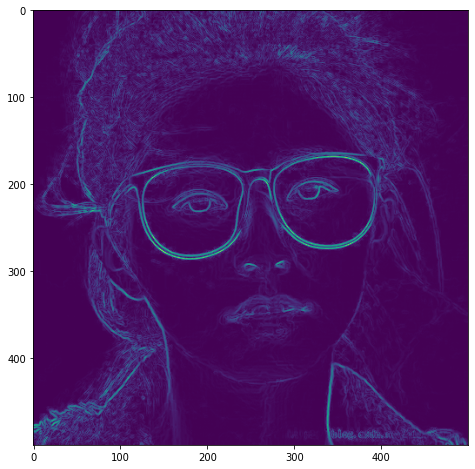

In [8]:
gray = cv2.imread('C:\\Users\\12646\\Desktop\\face_decetor\\2.jpeg', 0)
im = np.float32(gray) / 255.0
# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
plt.figure(figsize=(12,8))
plt.imshow(mag)
plt.show()


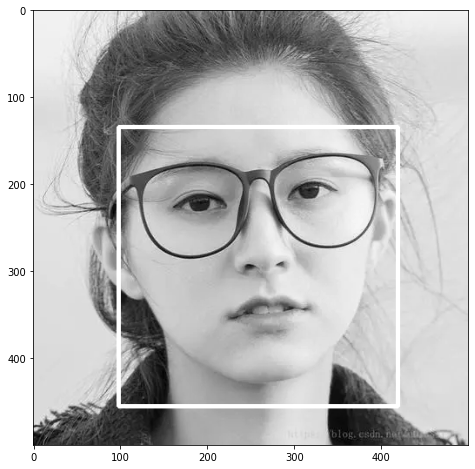

In [9]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)

plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()


In [1]:
### Imports ###################################################################
#树莓派专用,调低帧率
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
import os
import dlib
from imutils import face_utils

### Setup #####################################################################

# Center coordinates
cx = 160
cy = 120

os.system( "echo 0=150 > /dev/servoblaster" )
os.system( "echo 1=150 > /dev/servoblaster" )

xdeg = 150
ydeg = 150

# Setup the camera
camera = PiCamera()
camera.resolution = ( 320, 240)
camera.framerate = 60
rawCapture = PiRGBArray( camera, size=( 320, 240) )

# Load a cascade file for detecting faces
face_detect = dlib.get_frontal_face_detector()
t_start = time.time()
fps = 0


### Main ######################################################################

# Capture frames from the camera
for frame in camera.capture_continuous( rawCapture, format="bgr", use_video_port=True ):

    image = frame.array

    # Use the cascade file we loaded to detect faces
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    faces = face_detect( gray ,1)

    #print("Found " + str( len( faces ) ) + " face(s)")

    # Draw a rectangle around every face and move the motor towards the face
    for (i, rect) in enumerate(faces):
    
        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        tx = x + w/2
        ty = y + h/2

        if   ( cx - tx >  10 and xdeg <= 190 ):
            xdeg += 3
            os.system( "echo 0=" + str( xdeg ) + " > /dev/servoblaster" )
        elif ( cx - tx < -10 and xdeg >= 110 ):
            xdeg -= 3
            os.system( "echo 0=" + str( xdeg ) + " > /dev/servoblaster" )

        if   ( cy - ty >  10 and ydeg >= 110 ):
            ydeg -= 3
            os.system( "echo 1=" + str( ydeg ) + " > /dev/servoblaster" )
        elif ( cy - ty < -10 and ydeg <= 190 ):
            ydeg += 3
            os.system( "echo 1=" + str( ydeg ) + " > /dev/servoblaster" )

    # Calculate and show the FPS
    fps = fps + 1
    sfps = fps / ( time.time() - t_start )
    cv2.putText( image, "FPS : " + str( int( sfps ) ), ( 10, 10 ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 )    

    # Show the frame

    cv2.imshow( "Frame", image )
    cv2.waitKey( 1 )

    # Clear the stream in preparation for the next frame
    rawCapture.truncate( 0 )

/usr/lib/python3/dist-packages/picamera/encoders.py:544: PiCameraResolutionRounded: frame size rounded up from 500x500 to 512x512
  width, height, fwidth, fheight)))


In [ ]:
### Imports ###################################################################
#树莓派专用，跳频
### Imports ###################################################################

from picamera.array import PiRGBArray
from picamera import PiCamera

import time
import cv2
import os
import pygame
import dlib
from imutils import face_utils


### Setup #####################################################################

os.putenv( 'SDL_FBDEV', '/dev/fb1' )

# Setup the camera
camera = PiCamera()
camera.resolution = ( 320, 240 )
camera.framerate = 30
rawCapture = PiRGBArray( camera, size=( 320, 240 ) )

fcounter = 0
facefind = 0

# Load a cascade file for detecting faces
face_detect = dlib.get_frontal_face_detector()

t_start = time.time()
fps = 0

### Main ######################################################################

# Capture frames from the camera
for frame in camera.capture_continuous( rawCapture, format="bgr", use_video_port=True ):

    image = frame.array

    # Run the face detection algorithm every four frames
    if fcounter == 3:

        fcounter = 0

        # Look for faces in the image using the loaded cascade file
        gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
        faces = face_detect( gray,1 )

        print "Found " + str( len( faces ) ) + " face(s)"

        if str( len( faces ) ) != 0:
            facefind = 1
            facess = faces
        else:
            facefind = 0

        # Draw a rectangle around every face
        for ( x, y, w, h ) in faces:
            cv2.rectangle( image, ( x, y ), ( x + w, y + h ), ( 200, 255, 0 ), 2 )
            cv2.putText( image, "Face No." + str( len( facess ) ), ( x, y ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 )
            facess = faces

    else:
        if facefind == 1 and str( len( facess ) ) != 0:

            # Continue to draw the rectangle around every face
            for ( x, y, w, h ) in facess:
                cv2.rectangle( image, ( x, y ), ( x + w, y + h ), ( 200, 255, 0 ), 2 )
                cv2.putText( image, "Face No." + str( len( facess ) ), ( x, y ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 )

    fcounter += 1


    # Calculate and show the FPS
    fps = fps + 1
    sfps = fps / ( time.time() - t_start )
    cv2.putText( image, "FPS : " + str( int( sfps ) ), ( 10, 10 ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 )

    cv2.imshow( "Frame", image )
    cv2.waitKey( 1 )

    # Clear the stream in preparation for the next frame
    rawCapture.truncate( 0 )

In [ ]:
#将cpu跑满
### Imports ###################################################################

from picamera.array import PiRGBArray
from picamera import PiCamera
from functools import partial

import multiprocessing as mp
import cv2
import os
import time
import dlib
from imutils import face_utils


### Setup #####################################################################

os.putenv( 'SDL_FBDEV', '/dev/fb0' )

resX = 320
resY = 240

cx = resX / 2
cy = resY / 2

os.system( "echo 0=150 > /dev/servoblaster" )
os.system( "echo 1=150 > /dev/servoblaster" )

xdeg = 150
ydeg = 150


# Setup the camera
camera = PiCamera()
camera.resolution = ( resX, resY )
camera.framerate = 60

# Use this as our output
rawCapture = PiRGBArray( camera, size=( resX, resY ) )

# The face cascade file to be used
face_detect = dlib.get_frontal_face_detector()

t_start = time.time()
fps = 0


### Helper Functions ##########################################################

def get_faces( img ):

    gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )
    faces = face_detect( gray,1 )

    return faces, img

def draw_frame( img, faces ):

    global xdeg
    global ydeg
    global fps
    global time_t

    # Draw a rectangle around every face
    for ( x, y, w, h ) in faces:

        cv2.rectangle( img, ( x, y ),( x + w, y + h ), ( 200, 255, 0 ), 2 )
        cv2.putText(img, "Face No." + str( len( faces ) ), ( x, y ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 )

        tx = x + w/2
        ty = y + h/2

        if   ( cx - tx > 15 and xdeg <= 190 ):
            xdeg += 1
            os.system( "echo 0=" + str( xdeg ) + " > /dev/servoblaster" )
        elif ( cx - tx < -15 and xdeg >= 110 ):
            xdeg -= 1
            os.system( "echo 0=" + str( xdeg ) + " > /dev/servoblaster" )

        if   ( cy - ty > 15 and ydeg >= 110 ):
            ydeg -= 1
            os.system( "echo 1=" + str( ydeg ) + " > /dev/servoblaster" )
        elif ( cy - ty < -15 and ydeg <= 190 ):
            ydeg += 1
            os.system( "echo 1=" + str( ydeg ) + " > /dev/servoblaster" )

    # Calculate and show the FPS
    fps = fps + 1
    sfps = fps / (time.time() - t_start)
    cv2.putText(img, "FPS : " + str( int( sfps ) ), ( 10, 10 ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ( 0, 0, 255 ), 2 ) 

    cv2.imshow( "Frame", img )
    cv2.waitKey( 1 )


### Main ######################################################################

if __name__ == '__main__':

    pool = mp.Pool( processes=4 )
    fcount = 0

    camera.capture( rawCapture, format="bgr" )  

    r1 = pool.apply_async( get_faces, [ rawCapture.array ] )    
    r2 = pool.apply_async( get_faces, [ rawCapture.array ] )    
    r3 = pool.apply_async( get_faces, [ rawCapture.array ] )    
    r4 = pool.apply_async( get_faces, [ rawCapture.array ] )    

    f1, i1 = r1.get()
    f2, i2 = r2.get()
    f3, i3 = r3.get()
    f4, i4 = r4.get()

    rawCapture.truncate( 0 )    

    for frame in camera.capture_continuous( rawCapture, format="bgr", use_video_port=True ):
        image = frame.array

        if   fcount == 1:
            r1 = pool.apply_async( get_faces, [ image ] )
            f2, i2 = r2.get()
            draw_frame( i2, f2 )

        elif fcount == 2:
            r2 = pool.apply_async( get_faces, [ image ] )
            f3, i3 = r3.get()
            draw_frame( i3, f3 )

        elif fcount == 3:
            r3 = pool.apply_async( get_faces, [ image ] )
            f4, i4 = r4.get()
            draw_frame( i4, f4 )

        elif fcount == 4:
            r4 = pool.apply_async( get_faces, [ image ] )
            f1, i1 = r1.get()
            draw_frame( i1, f1 )

            fcount = 0

        fcount += 1

        rawCapture.truncate( 0 )

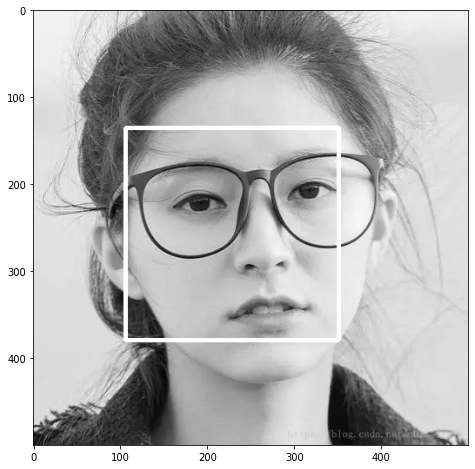

In [2]:
#笔记本用
#cnn
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX
import numpy as np
dnnFaceDetector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
gray = cv2.imread('C:\\Users\\12646\\Desktop\\face_decetor\\2.jpeg', 0)
rects = dnnFaceDetector(gray, 1)
for (i, rect) in enumerate(rects):
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()
    # Rectangle around the face
    cv2.rectangle(gray, (x1, y1), (x2, y2), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()


In [ ]:
video_capture = cv2.VideoCapture(0)
flag = 0

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = dnnFaceDetector(gray, 1)

    for (i, rect) in enumerate(rects):

        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the video output
    cv2.imshow('Video', frame)

    # Quit video by typing Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()
